## Bi-dimensional Classification

- Aurora Cerabolini
- Veronica Morelli

## Import packages

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from matplotlib import pyplot as plt 
import zipfile
import os
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
from tensorflow.keras import layers
import pandas as pd
from time import time
from skimage import io
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Dataset download and Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
copyfile('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/data.zip', 'data.zip') 

'data.zip'

In [ ]:
t0 = time()
zip = zipfile.ZipFile('data.zip') 
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 3.215 seconds


#### Dataset for evaluation

Nel dataset per l'evaluation è presente un'immagine per ogni classe

In [ ]:
copyfile('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/evaluation.zip', 'evaluation.zip') 

'evaluation.zip'

In [ ]:
t0 = time()
zip = zipfile.ZipFile('evaluation.zip') 
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 0.014 seconds


In [ ]:
path_ev = os.listdir('/content/evaluation/')
path_ev.remove('.DS_Store') 

## List of all subdirectories with the corresponding number of images

In [ ]:
dir = []
for name in os.listdir('data/'):
    dir_path = os.path.join('data/', name)
    if os.path.isdir(dir_path):
        dir.append((name, len(list(map(os.path.isfile, os.listdir(dir_path))))))
dir

[('Pepper, Healthy', 1476),
 ('Cherry, Healthy', 1052),
 ('Tomato, Unhealthy', 1425),
 ('Grape, Healthy', 1021),
 ('Cherry, Unhealthy', 1050),
 ('Tomato, Healthy', 1589),
 ('Pepper, Unhealthy', 1095),
 ('Apple, Healthy', 1543),
 ('Corn, Healthy', 1160),
 ('Corn, Unhealthy', 1496),
 ('Grape, Unhealthy', 1178),
 ('Apple, Unhealthy', 1424)]

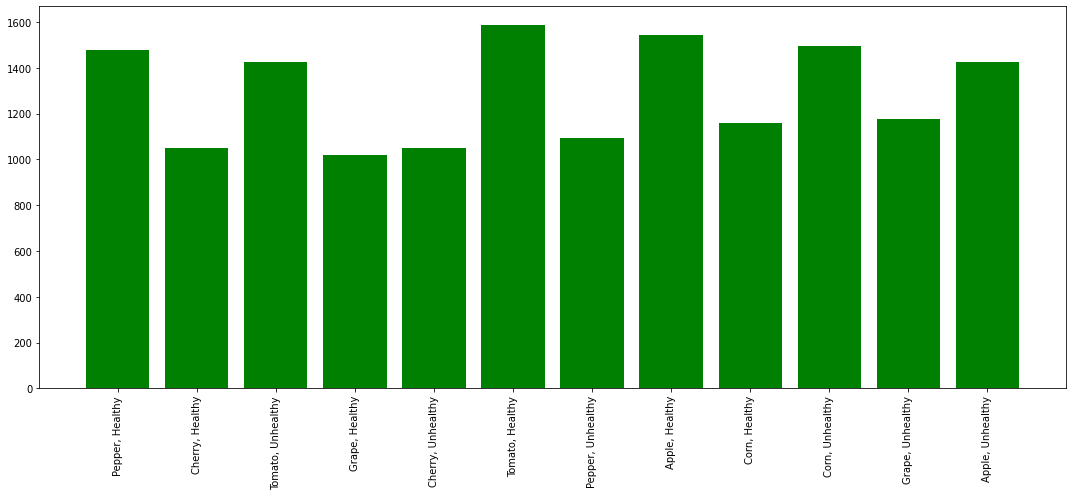

In [ ]:
classes = []
frequency = []
for i in range(len(dir)):
  classes.append(dir[i][0])
  frequency.append(dir[i][1])

indices = np.arange(len(dir))
plt.figure(figsize=(15, 7))
plt.bar(indices, frequency, color='green')
plt.xticks(indices, classes, rotation='vertical')
plt.tight_layout()
plt.show()

## Creation of a dictionary of key value pairs of images and labels

In [ ]:
path = os.listdir('data/')
path.remove('.DS_Store') 
key_value = dict()
for t in range(len(path)):
    key_value[path[t]] = os.listdir('data/'+path[t])

## Full path in which images are stored

In [ ]:
df = []
for i in range(len(path)):
    for j in range(len(key_value[path[i]])):
        df.append(['data/'+path[i]+'/'+key_value[path[i]][j],path[i]])

## Converting into dataframe

In [ ]:
dataset = pd.DataFrame(df,columns=['image','label'])
dataset

image             label
0      data/Pepper, Healthy/7b3b16d2-e0d2-4c91-acc1-3...   Pepper, Healthy
1      data/Pepper, Healthy/c0183c29-b09d-42a6-a376-9...   Pepper, Healthy
2      data/Pepper, Healthy/9b3b71d1-ad33-4512-8dd2-a...   Pepper, Healthy
3      data/Pepper, Healthy/71e8540f-309c-4022-97c7-7...   Pepper, Healthy
4      data/Pepper, Healthy/5b6539ac-0d6d-401b-a862-f...   Pepper, Healthy
...                                                  ...               ...
15504  data/Apple, Unhealthy/3908d563-a8f8-4206-b09e-...  Apple, Unhealthy
15505  data/Apple, Unhealthy/52d8da3b-5d74-43ba-b527-...  Apple, Unhealthy
15506  data/Apple, Unhealthy/6344cfa8-2c26-4498-b366-...  Apple, Unhealthy
15507  data/Apple, Unhealthy/fb911d9c-0445-4d0f-886e-...  Apple, Unhealthy
15508  data/Apple, Unhealthy/80ddd81b-9c75-4711-8012-...  Apple, Unhealthy

[15509 rows x 2 columns]

## String-to-List conversion

In [ ]:
dataset['label'] = dataset['label'].apply( lambda x: x.split(',') )
dataset.head()

image               label
0  data/Pepper, Healthy/7b3b16d2-e0d2-4c91-acc1-3...  [Pepper,  Healthy]
1  data/Pepper, Healthy/c0183c29-b09d-42a6-a376-9...  [Pepper,  Healthy]
2  data/Pepper, Healthy/9b3b71d1-ad33-4512-8dd2-a...  [Pepper,  Healthy]
3  data/Pepper, Healthy/71e8540f-309c-4022-97c7-7...  [Pepper,  Healthy]
4  data/Pepper, Healthy/5b6539ac-0d6d-401b-a862-f...  [Pepper,  Healthy]

In [ ]:
dataset['image'] = dataset['image'].apply( lambda x: x.split('data/')[1])
dataset.head()

image               label
0  Pepper, Healthy/7b3b16d2-e0d2-4c91-acc1-3778b3...  [Pepper,  Healthy]
1  Pepper, Healthy/c0183c29-b09d-42a6-a376-90806c...  [Pepper,  Healthy]
2  Pepper, Healthy/9b3b71d1-ad33-4512-8dd2-a7277e...  [Pepper,  Healthy]
3  Pepper, Healthy/71e8540f-309c-4022-97c7-7ce276...  [Pepper,  Healthy]
4  Pepper, Healthy/5b6539ac-0d6d-401b-a862-fd4730...  [Pepper,  Healthy]

## Convert labels into one-hot representation

In [ ]:
one_hot = pd.get_dummies(dataset['label'].apply(pd.Series).stack()).sum(level=0)
data_label = pd.concat([dataset, one_hot], axis=1)
data_label

<ipython-input-10-1fc80df9aaed>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot = pd.get_dummies(dataset['label'].apply(pd.Series).stack()).sum(level=0)


image                label  \
0      Pepper, Healthy/7b3b16d2-e0d2-4c91-acc1-3778b3...   [Pepper,  Healthy]   
1      Pepper, Healthy/c0183c29-b09d-42a6-a376-90806c...   [Pepper,  Healthy]   
2      Pepper, Healthy/9b3b71d1-ad33-4512-8dd2-a7277e...   [Pepper,  Healthy]   
3      Pepper, Healthy/71e8540f-309c-4022-97c7-7ce276...   [Pepper,  Healthy]   
4      Pepper, Healthy/5b6539ac-0d6d-401b-a862-fd4730...   [Pepper,  Healthy]   
...                                                  ...                  ...   
15504  Apple, Unhealthy/3908d563-a8f8-4206-b09e-1ae34...  [Apple,  Unhealthy]   
15505  Apple, Unhealthy/52d8da3b-5d74-43ba-b527-bc8fc...  [Apple,  Unhealthy]   
15506  Apple, Unhealthy/6344cfa8-2c26-4498-b366-817d5...  [Apple,  Unhealthy]   
15507  Apple, Unhealthy/fb911d9c-0445-4d0f-886e-50458...  [Apple,  Unhealthy]   
15508  Apple, Unhealthy/80ddd81b-9c75-4711-8012-7ee68...  [Apple,  Unhealthy]   

        Healthy   Unhealthy  Apple  Cherry  Corn  Grape  Pepper  Tomato  
0             1           0      0       0     0      0       1       0  
1             1           0      0       0     0      0       1       0  
2             1           0      0       0     0      0       1       0  
3             1           0      0       0     0      0       1       0  
4             1           0      0       0     0      0       1       0  
...         ...         ...    ...     ...   ...    ...     ...     ...  
15504         0           1      1       0     0      0       0       0  
15505         0           1      1       0     0      0       0       0  
15506         0           1      1       0     0      0       0       0  
15507         0           1      1       0     0      0       0       0  
15508         0           1      1       0     0      0       0       0  

[15509 rows x 10 columns]

In [ ]:
data_label.shape

(15509, 10)

In [ ]:
data_label.columns[2:]

Index([' Healthy', ' Unhealthy', 'Apple', 'Cherry', 'Corn', 'Grape', 'Pepper',
       'Tomato'],
      dtype='object')

In [ ]:
data_label = ['Healthy', ' Unhealthy', 'Apple', 'Cherry', 'Corn', 'Grape', 'Pepper', 'Tomato']

## Remove the _image_ and _label_ columns from the _data_label_ dataframe  and convert the remaining columns to an array which will be the target for the images

In [ ]:
y = np.array(data_label.drop(['image', 'label'],axis=1)) 
y

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

## Image loading

In [ ]:
#to load the images in the same order as the labels
data_image = []
for i in range(data_label.shape[0]):
  img = image.load_img('data/' + data_label['image'][i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  data_image.append(img)
x = np.array(data_image)

In [ ]:
x.shape

(15509, 224, 224, 3)

## Visualize Data

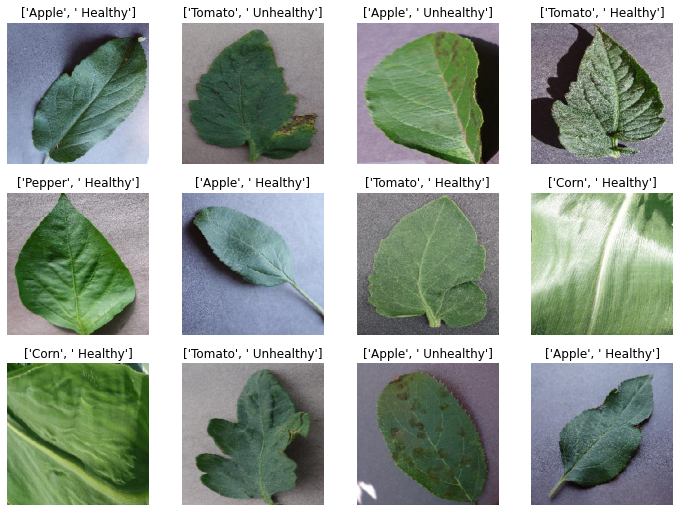

In [ ]:
import random
plt.figure(figsize=(12, 12))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  index=random.randint(0,15533)
  plt.imshow(x[index])
  title = data_label['label'][index]
  plt.title(title)
  plt.axis("off")

## Split into training, validation and test sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, random_state=1, stratify = y, test_size=0.2, shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=1, stratify = y_train, test_size=0.125, shuffle=True)

In [ ]:
X_train.shape

(10856, 224, 224, 3)

In [ ]:
X_val.shape

(3102, 224, 224, 3)

In [ ]:
X_test.shape

(1551, 224, 224, 3)

In [ ]:
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_train', X_train)
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_val', X_val)
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_test', X_test)
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_train', y_train)
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_val', y_val)
#np.save('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_test', y_test)

In [ ]:
X_train = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_train.npy')
X_val = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_val.npy')
X_test = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/X_test.npy')
y_train = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_train.npy')
y_val = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_val.npy')
y_test = np.load('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/y_test.npy')

## Defining a Model

## Model 1

In [ ]:
inputs = keras.Input((224,224,3))

x = keras.layers.Conv2D(32, 3, padding="same")(inputs)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(128, activation="relu")(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model1 = keras.Model(inputs, outputs)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

In [ ]:
model1.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 19s 97ms/step - loss: 0.8052 - categorical_accuracy: 0.3205 - val_loss: 0.6839 - val_categorical_accuracy: 0.0000e+00
Epoch 2/50
85/85 [==============================] - 6s 66ms/step - loss: 0.5915 - categorical_accuracy: 0.5146 - val_loss: 0.6777 - val_categorical_accuracy: 0.0000e+00
Epoch 3/50
85/85 [==============================] - 6s 67ms/step - loss: 0.5179 - categorical_accuracy: 0.6082 - val_loss: 0.6590 - val_categorical_accuracy: 0.0000e+00
Epoch 4/50
85/85 [==============================] - 6s 66ms/step - loss: 0.4937 - categorical_accuracy: 0.6289 - val_loss: 0.6172 - val_categorical_accuracy: 0.0100
Epoch 5/50
85/85 [==============================] - 6s 66ms/step - loss: 0.4803 - categorical_accuracy: 0.6441 - val_loss: 0.5615 - val_categorical_accuracy: 0.2940
Epoch 6/50
85/85 [==============================] - 6s 66ms/step - loss: 0.4688 - categorical_accuracy: 0.6543 - val_loss: 0.5100 - val_categorical_accuracy: 0.56

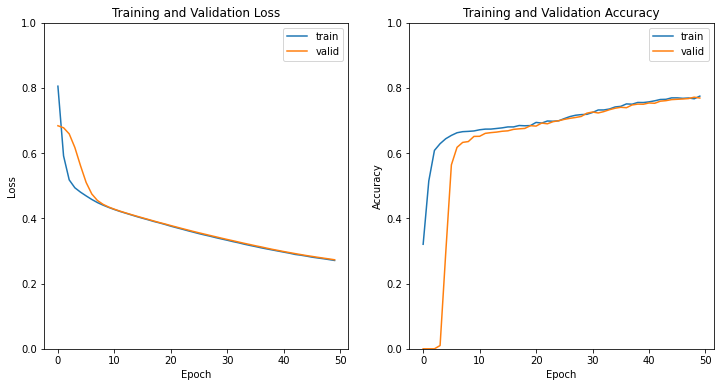

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history1.history['categorical_accuracy']) 
plt.plot(history1.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
model1.save('model1.h5') 

È possibile notare un leggero overfitting, infatti la loss ottenuta sul validation è superiore alla loss ottenuta sul training.
Nella costruzione dei modelli successivi si cercherà di migliorare le performance.

#### Evaluation

In [ ]:
model1=None
model1=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model1.h5')

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 25ms/step - loss: 0.2702 - categorical_accuracy: 0.7937


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img)
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model1.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 17ms/step


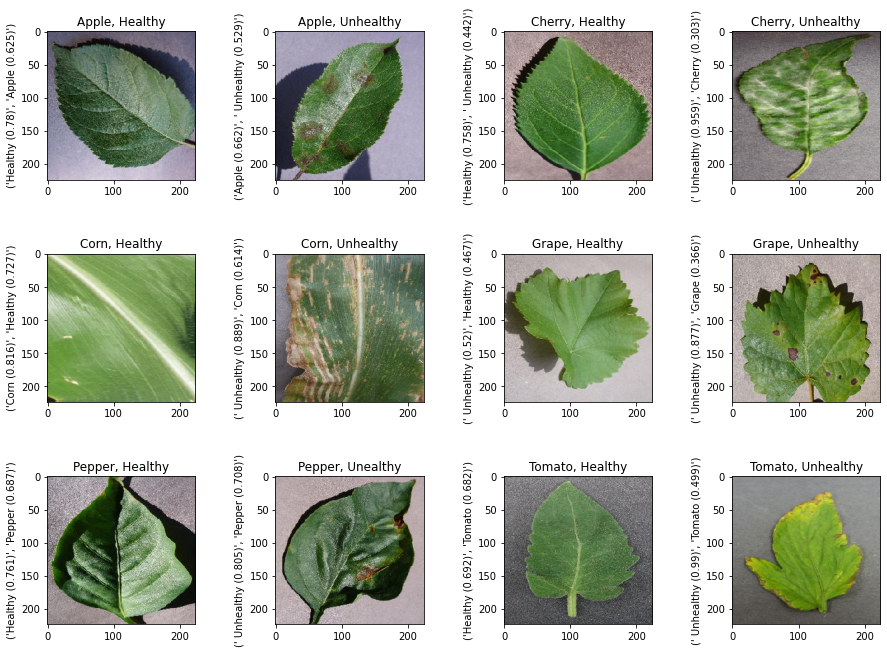

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Il modello classifica correttamente 10 immagini su 12.

## Image data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"), 
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

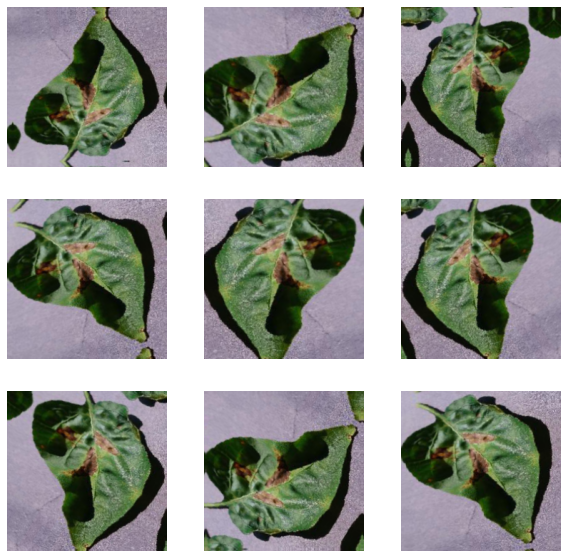

In [ ]:
plt.figure(figsize=(10, 10))
first_image = X_test[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training = True)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    plt.axis('off') 

## Model 2

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)

x = keras.layers.Conv2D(32, 3, padding="same")(inputs)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model2 = keras.Model(inputs, outputs)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

In [ ]:
model2.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 9s 94ms/step - loss: 1.6327 - categorical_accuracy: 0.0937 - val_loss: 0.6823 - val_categorical_accuracy: 0.0793
Epoch 2/50
85/85 [==============================] - 6s 68ms/step - loss: 1.3093 - categorical_accuracy: 0.1653 - val_loss: 0.6798 - val_categorical_accuracy: 0.3582
Epoch 3/50
85/85 [==============================] - 6s 67ms/step - loss: 1.1203 - categorical_accuracy: 0.2188 - val_loss: 0.6626 - val_categorical_accuracy: 0.5338
Epoch 4/50
85/85 [==============================] - 6s 67ms/step - loss: 1.0002 - categorical_accuracy: 0.2614 - val_loss: 0.6203 - val_categorical_accuracy: 0.5393
Epoch 5/50
85/85 [==============================] - 6s 67ms/step - loss: 0.9197 - categorical_accuracy: 0.2975 - val_loss: 0.5678 - val_categorical_accuracy: 0.5397
Epoch 6/50
85/85 [==============================] - 6s 67ms/step - loss: 0.8585 - categorical_accuracy: 0.3146 - val_loss: 0.5290 - val_categorical_accuracy: 0.5912
Epoch 7/50

Text(0.5, 1.0, 'Training and Validation Accuracy')

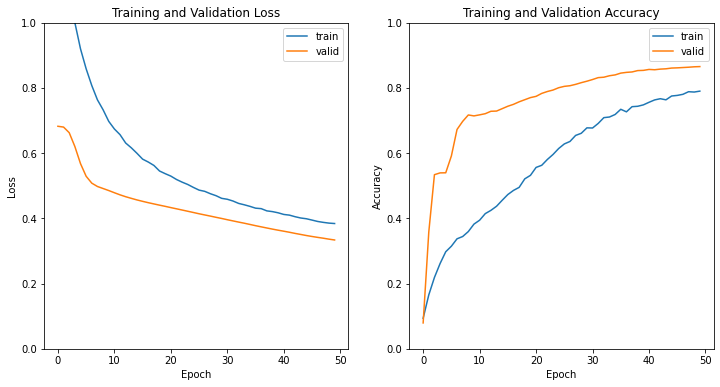

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history2.history['categorical_accuracy']) 
plt.plot(history2.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy')

In [ ]:
model2.save('model2.h5') 

Il modello è più stabile ma la loss ottenuta sia sul training sia sul validation è alta 

#### Evaluation

In [ ]:
model2=None
model2=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model2.h5')

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 25ms/step - loss: 0.3328 - categorical_accuracy: 0.8736


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img) 
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model2.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 20ms/step


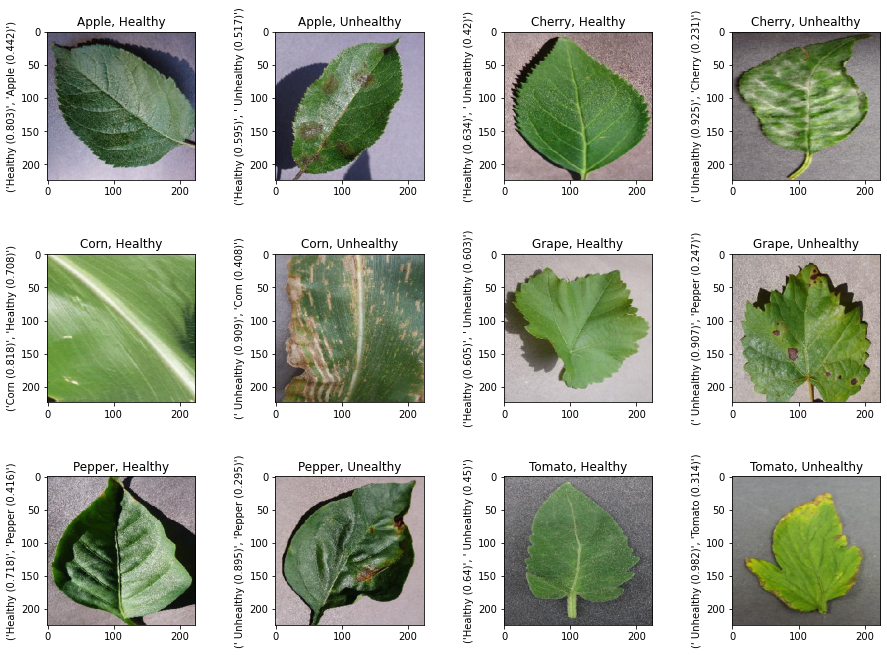

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Riesce a classificare correttamente 7 immagini su 12.

## Model 3

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)

x = keras.layers.Conv2D(32, 3, padding="same")(inputs)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model3 = keras.Model(inputs, outputs)

In [ ]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 dropout_1 (Dropout)         (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                       

In [ ]:
model3.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 10s 105ms/step - loss: 1.0489 - categorical_accuracy: 0.3026 - val_loss: 0.6659 - val_categorical_accuracy: 0.1615
Epoch 2/50
85/85 [==============================] - 7s 80ms/step - loss: 0.8045 - categorical_accuracy: 0.3511 - val_loss: 0.6301 - val_categorical_accuracy: 0.5397
Epoch 3/50
85/85 [==============================] - 7s 80ms/step - loss: 0.7082 - categorical_accuracy: 0.4022 - val_loss: 0.6042 - val_categorical_accuracy: 0.5397
Epoch 4/50
85/85 [==============================] - 7s 80ms/step - loss: 0.6451 - categorical_accuracy: 0.4437 - val_loss: 0.5848 - val_categorical_accuracy: 0.5397
Epoch 5/50
85/85 [==============================] - 7s 79ms/step - loss: 0.5954 - categorical_accuracy: 0.4874 - val_loss: 0.5657 - val_categorical_accuracy: 0.5397
Epoch 6/50
85/85 [==============================] - 7s 80ms/step - loss: 0.5628 - categorical_accuracy: 0.5157 - val_loss: 0.5435 - val_categorical_accuracy: 0.5400
Epoch 7/

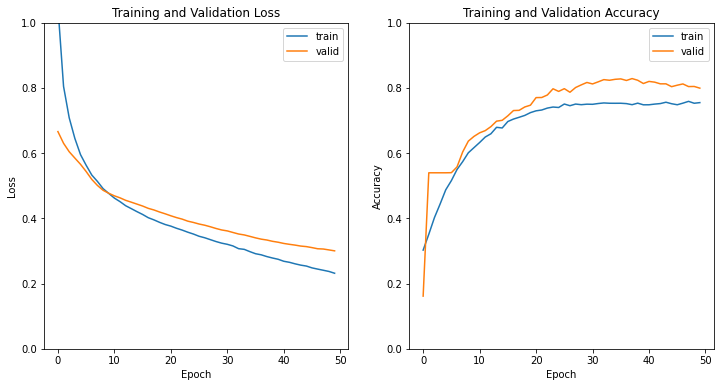

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history3.history['loss']) 
plt.plot(history3.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history3.history['categorical_accuracy']) 
plt.plot(history3.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
model3.save('model3.h5') 

Questo modello presenta una situazione di overfitting in quanto la loss sul validation è più alta della loss sul training.

#### Evaluation

In [ ]:
model3=None
model3=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model3.h5')

In [ ]:
loss, accuracy = model3.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 25ms/step - loss: 0.3019 - categorical_accuracy: 0.8137


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img) 
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model3.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 18ms/step


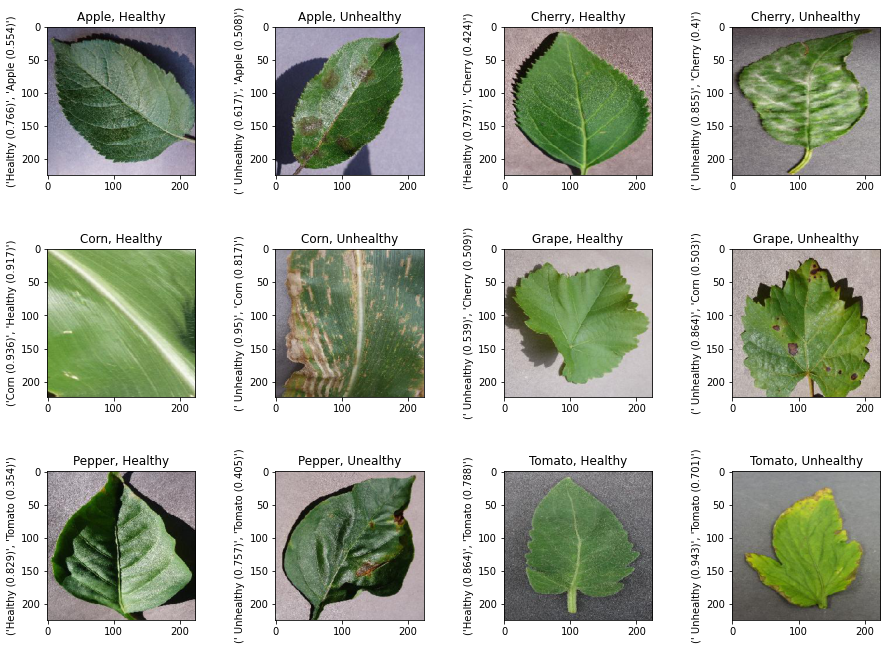

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Riesce a classificare correttamente 8 immagini su 12.

## Model 4

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)

x = keras.layers.Conv2D(32, 3, padding="same")(inputs)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model4 = keras.Model(inputs, outputs)

In [ ]:
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 dropout_6 (Dropout)         (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                       

In [ ]:
model4.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history4 = model4.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 10s 105ms/step - loss: 1.0908 - categorical_accuracy: 0.1624 - val_loss: 0.6513 - val_categorical_accuracy: 0.5397
Epoch 2/50
85/85 [==============================] - 7s 80ms/step - loss: 0.8173 - categorical_accuracy: 0.2930 - val_loss: 0.6067 - val_categorical_accuracy: 0.5397
Epoch 3/50
85/85 [==============================] - 7s 80ms/step - loss: 0.7204 - categorical_accuracy: 0.3601 - val_loss: 0.5799 - val_categorical_accuracy: 0.5397
Epoch 4/50
85/85 [==============================] - 7s 80ms/step - loss: 0.6559 - categorical_accuracy: 0.3989 - val_loss: 0.5591 - val_categorical_accuracy: 0.5397
Epoch 5/50
85/85 [==============================] - 7s 80ms/step - loss: 0.6115 - categorical_accuracy: 0.4497 - val_loss: 0.5325 - val_categorical_accuracy: 0.5397
Epoch 6/50
85/85 [==============================] - 7s 79ms/step - loss: 0.5759 - categorical_accuracy: 0.4808 - val_loss: 0.4997 - val_categorical_accuracy: 0.5596
Epoch 7/

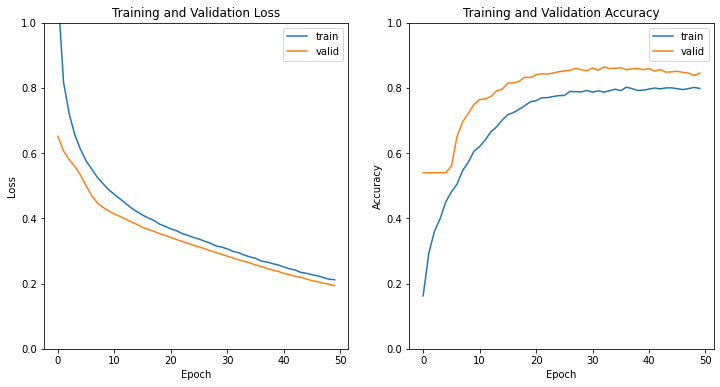

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history4.history['loss']) 
plt.plot(history4.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history4.history['categorical_accuracy']) 
plt.plot(history4.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
model4.save('model4.h5') 

Le performance del Modello 4 sul dataset di validation sono stabili e il valore di loss è basso, senza presenza di overfitting.

#### Evaluation

In [ ]:
model4=None
model4=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model4.h5')

In [ ]:
loss, accuracy = model4.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 1s 25ms/step - loss: 0.1893 - accuracy: 0.8246


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img) 
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model4.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 20ms/step


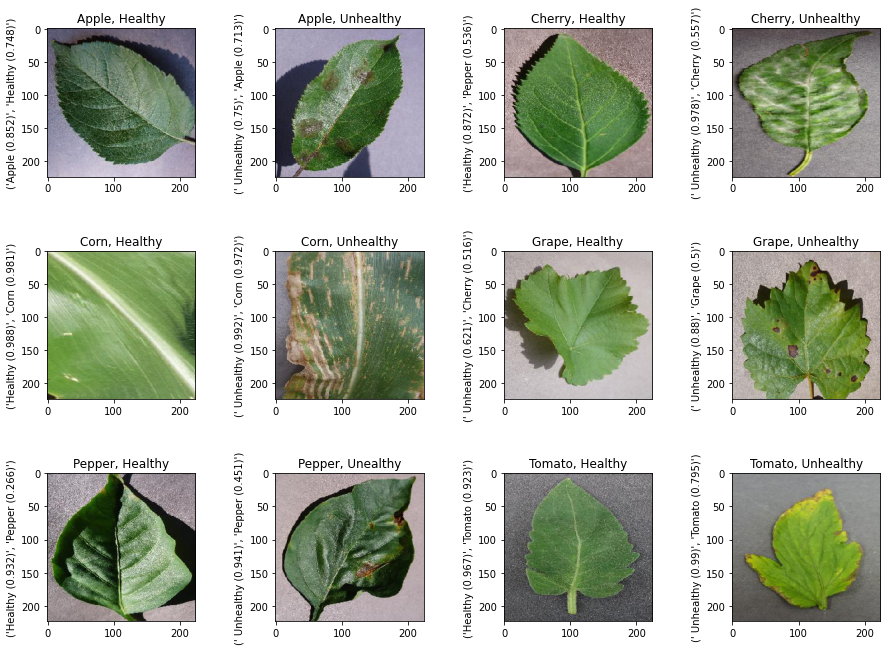

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Questo modello riesce a classificare correttamente 10 immagini su 12, come il Modello 1. Rispetto al Modello 1, però, non si osserva overfitting e le previsioni errate sono comunque migliori in quanto riesce ad associare ad ogni immagine sia lo stato di salute sia il tipo di foglia (seppur errato in due immagini).

## Model 5 - Transfer Learning

In [ ]:
# Base model
base_net = keras.applications.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False, pooling='max')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_net.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = data_augmentation(x)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_net(x)

x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model5 = keras.Model(inputs, outputs)

In [ ]:
model5.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history5 = model5.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 17s 156ms/step - loss: 1.0384 - categorical_accuracy: 0.1799 - val_loss: 0.5763 - val_categorical_accuracy: 0.4603
Epoch 2/50
85/85 [==============================] - 11s 128ms/step - loss: 0.7607 - categorical_accuracy: 0.2550 - val_loss: 0.5517 - val_categorical_accuracy: 0.4603
Epoch 3/50
85/85 [==============================] - 11s 129ms/step - loss: 0.6561 - categorical_accuracy: 0.3021 - val_loss: 0.5471 - val_categorical_accuracy: 0.4603
Epoch 4/50
85/85 [==============================] - 11s 128ms/step - loss: 0.6071 - categorical_accuracy: 0.3418 - val_loss: 0.5431 - val_categorical_accuracy: 0.4603
Epoch 5/50
85/85 [==============================] - 11s 129ms/step - loss: 0.5805 - categorical_accuracy: 0.3911 - val_loss: 0.5372 - val_categorical_accuracy: 0.4568
Epoch 6/50
85/85 [==============================] - 11s 129ms/step - loss: 0.5665 - categorical_accuracy: 0.4253 - val_loss: 0.5321 - val_categorical_accuracy: 0.444

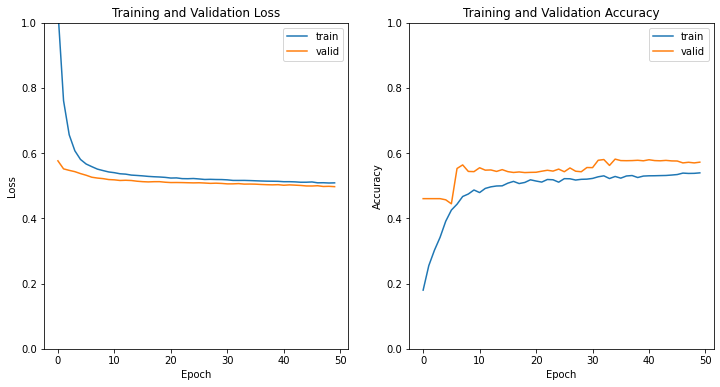

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history5.history['loss']) 
plt.plot(history5.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history5.history['categorical_accuracy']) 
plt.plot(history5.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
model5.save('model5.h5') 

I risultati non soddisfacenti ottenuti tramite questo approccio non sono inaspettati, in quando in ImageNet è presente solo una classe potenzialmente utile relativa a piante di mais, che però non permette di ottenere buoni risultati nel riconoscimento di diversi tipi di foglia.

#### Evaluation

In [ ]:
model5=None
model5=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model5.h5')

In [ ]:
loss, accuracy = model5.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 1s 51ms/step - loss: 0.4974 - categorical_accuracy: 0.5719


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img) 
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model5.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 23ms/step


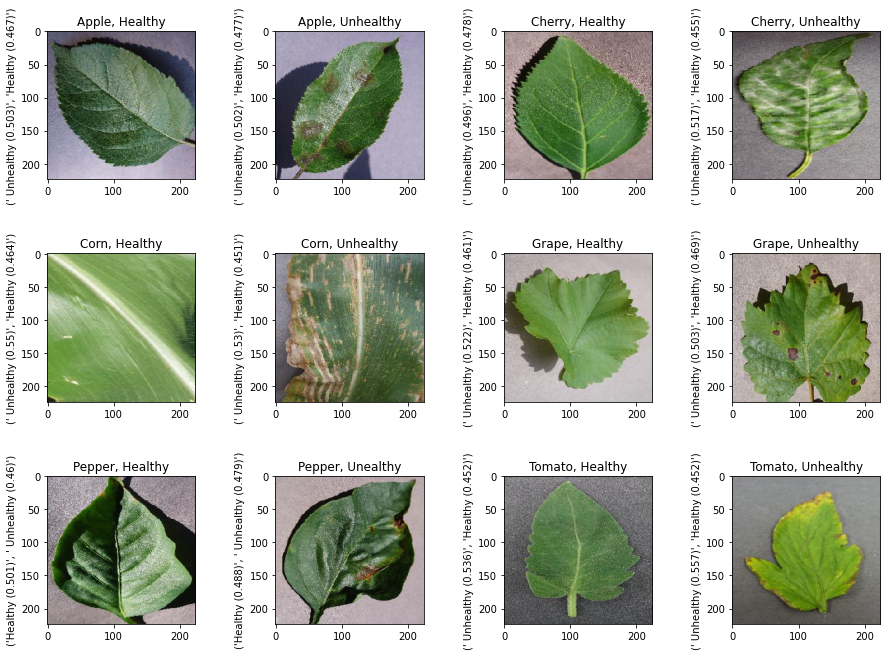

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Nessuna immagine è classificata correttamente.

## Model 6 - Transfer Learning

In [ ]:
# Base model
base_net = keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False, pooling='max')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
base_net.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = data_augmentation(x)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = base_net(x)

x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(8, activation='sigmoid')(x)
model6 = keras.Model(inputs, outputs)

In [ ]:
model6.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history6 = model6.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

Epoch 1/50
85/85 [==============================] - 21s 200ms/step - loss: 1.0909 - categorical_accuracy: 0.1148 - val_loss: 0.6403 - val_categorical_accuracy: 0.0000e+00
Epoch 2/50
85/85 [==============================] - 14s 167ms/step - loss: 0.7945 - categorical_accuracy: 0.2131 - val_loss: 0.5651 - val_categorical_accuracy: 0.5397
Epoch 3/50
85/85 [==============================] - 14s 165ms/step - loss: 0.6848 - categorical_accuracy: 0.2706 - val_loss: 0.5457 - val_categorical_accuracy: 0.5400
Epoch 4/50
85/85 [==============================] - 14s 164ms/step - loss: 0.6326 - categorical_accuracy: 0.3144 - val_loss: 0.5408 - val_categorical_accuracy: 0.5403
Epoch 5/50
85/85 [==============================] - 14s 164ms/step - loss: 0.6033 - categorical_accuracy: 0.3441 - val_loss: 0.5376 - val_categorical_accuracy: 0.5403
Epoch 6/50
85/85 [==============================] - 14s 164ms/step - loss: 0.5806 - categorical_accuracy: 0.3816 - val_loss: 0.5341 - val_categorical_accuracy: 0

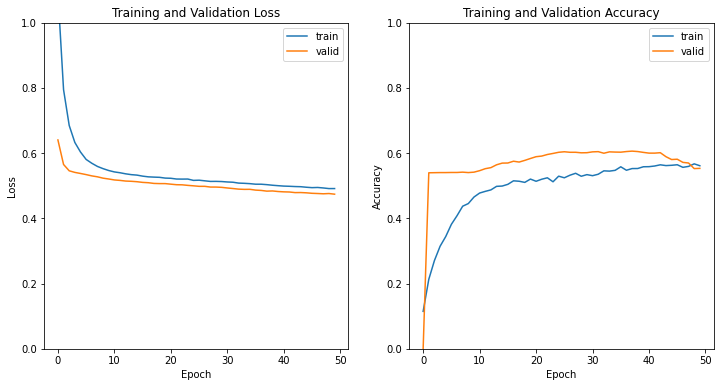

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history6.history['loss']) 
plt.plot(history6.history['val_loss']) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history6.history['categorical_accuracy']) 
plt.plot(history6.history['val_categorical_accuracy']) 
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
model6.save('model6.h5')

Anche in questo caso era prevedibile che il modello non avrebbe ottenuto delle performance soddisfacenti.

#### Evaluation

In [ ]:
model6=None
model6=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model6.h5')

In [ ]:
loss, accuracy = model6.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 1s 77ms/step - loss: 0.4744 - categorical_accuracy: 0.5506


In [ ]:
lista_pred = []
lista_img = []
lista_actual = []
classes = np.array(data_label)
for n_subf, subfold in enumerate(sorted(path_ev)): 
  subpath = os.path.join('/content/evaluation/', subfold) 
  for im,img in enumerate(sorted(os.listdir(subpath))): 
    if img.endswith('.jpg') or img.endswith('.JPG'):
      cur_path = os.path.join(subpath, img) 
      img = image.load_img(cur_path,target_size=(224,224,3))
      img = image.img_to_array(img)
      img = img/255
      proba = model6.predict(img.reshape(1,224,224,3))
      top_2 = np.argsort(proba[0])[:-3:-1]
      lista_pred.append(("{}".format(classes[top_2[0]])+" ({:.3})".format(proba[0][top_2[0]]), "{}".format(classes[top_2[1]])+" ({:.3})".format(proba[0][top_2[1]]) ))
      lista_img.append(cur_path)
      lista_actual.append(subfold)

1/1 [==============================] - 0s 26ms/step


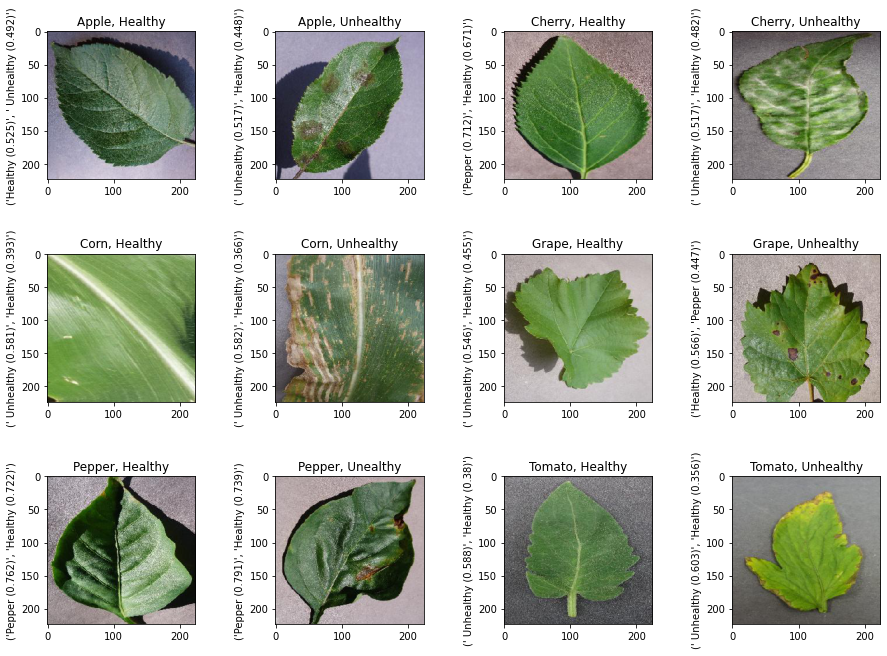

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  img = image.load_img(lista_img[i],target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)
  plt.ylabel(lista_pred[i])
  plt.title(lista_actual[i]);

Nessuna immagine è classificata correttamente.

## Evaluation - Demo

Model 4

In [ ]:
model4=None
model4=keras.models.load_model('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/model4.h5')

1/1 [==============================] - 0s 69ms/step
Healthy (0.926)
Cherry (0.638)


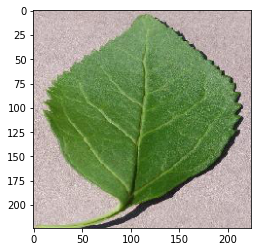

In [ ]:
classes = np.array(data_label)
img = image.load_img('gdrive/MyDrive/DSIM Project/BI-DIMENSIONAL/Cherry,Healthy.JPG',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model4.predict(img.reshape(1,224,224,3))
top_2 = np.argsort(proba[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.3})".format(proba[0][top_2[i]]))
plt.imshow(img);